In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [32]:
# imports 
import pandas as pd
import numpy as np

In [33]:
import os

for root, dirs, files in os.walk('/kaggle/input'):
    for file in files:
        print(os.path.join(root, file))

In [34]:
state_keys_df = pd.read_csv('./data/cases_state_key.csv')
print(state_keys_df.head())

   year  state_code      state_name pc11_state_name  pc11_state_id
0  2018           2  Andhra Pradesh  andhra pradesh             28
1  2011           2  Andhra Pradesh  andhra pradesh             28
2  2011          29       Telangana  andhra pradesh             28
3  2010          29       Telangana  andhra pradesh             28
4  2014           2  Andhra Pradesh  andhra pradesh             28


In [35]:
type_name_key_df = pd.read_csv('./data/type_name_key.csv')
print(type_name_key_df.head())

   year  type_name         type_name_s  count
0  2010        1.0            (m) t.s.     18
1  2010        2.0                (sc)      2
2  2010        3.0          ..mact 166     97
3  2010        4.0  04 complaint cases     19
4  2010        5.0    04 criminal case     21


In [234]:
cases_2018_df = pd.read_csv('./data/cases_2018.csv', error_bad_lines=False)
print(cases_2018_df.head())

ParserError: Error tokenizing data. C error: EOF inside string starting at row 592142

In [46]:


cases_data = []

cases_dict = {
    'cases_2018_df' : cases_2018_df, # the required data frames can be mentioned here , for now only a single one is being given as input because the kernel seems to be crashing 
}
for i in range(2018,2019) :
    key = f'cases_{i}_df'
    cases_data.append(cases_dict[key])
    
cases = pd.concat(cases_data , ignore_index=True)
print(cases.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012018  2018           1          1       1.0   
1  01-01-01-201900000022018  2018           1          1       1.0   
2  01-01-01-201900000032018  2018           1          1       1.0   
3  01-01-01-201900000042018  2018           1          1       1.0   
4  01-01-01-201900000052018  2018           1          1       1.0   

               cino             judge_position female_defendant  \
0  MHNB030000022018  chief judicial magistrate           0 male   
1  MHNB030000032018  chief judicial magistrate           0 male   
2  MHNB030000042018  chief judicial magistrate           0 male   
3  MHNB030000052018  chief judicial magistrate           0 male   
4  MHNB030000062018  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male         -9999.0             0.0     1943.0        2975.0   
1            0 m

In [47]:

print(state_keys_df.head())
print(type_name_key_df.head())

   year  state_code      state_name pc11_state_name  pc11_state_id
0  2018           2  Andhra Pradesh  andhra pradesh             28
1  2011           2  Andhra Pradesh  andhra pradesh             28
2  2011          29       Telangana  andhra pradesh             28
3  2010          29       Telangana  andhra pradesh             28
4  2014           2  Andhra Pradesh  andhra pradesh             28
   year  type_name         type_name_s  count
0  2010        1.0            (m) t.s.     18
1  2010        2.0                (sc)      2
2  2010        3.0          ..mact 166     97
3  2010        4.0  04 complaint cases     19
4  2010        5.0    04 criminal case     21


In [48]:
#merging the data for the state keys to the cu
merged_2018 = cases_2018_df.merge(state_keys_df[['state_code' , 'state_name']] , on='state_code' , how='left')
print(merged_2018.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012018  2018           1          1       1.0   
1  01-01-01-201900000012018  2018           1          1       1.0   
2  01-01-01-201900000012018  2018           1          1       1.0   
3  01-01-01-201900000012018  2018           1          1       1.0   
4  01-01-01-201900000012018  2018           1          1       1.0   

               cino             judge_position female_defendant  \
0  MHNB030000022018  chief judicial magistrate           0 male   
1  MHNB030000022018  chief judicial magistrate           0 male   
2  MHNB030000022018  chief judicial magistrate           0 male   
3  MHNB030000022018  chief judicial magistrate           0 male   
4  MHNB030000022018  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male         -9999.0             0.0     1943.0        2975.0   
1            0 m

In [49]:
# imports 
import matplotlib.pyplot as plt 

In [50]:
cases_by_state_year = merged_2018.groupby(['state_name' , 'year']).size().reset_index(name='count')

In [51]:
cases_by_state_year.head()

,state_name,year,count
0,Maharashtra,2018,3767994


In [52]:
cases_dist_key_df = pd.read_csv("./data/cases_district_key.csv")
cases_dist_key_df.head()

,year,state_code,state_name,dist_code,district_name,pc11_state_name,pc11_state_id,pc11_district_name,pc11_district_id
0,2010,2,Andhra Pradesh,7,Kadapa,andhra pradesh,28,NaN,NaN
1,2010,2,Andhra Pradesh,15,Nellore,andhra pradesh,28,NaN,NaN
2,2010,8,Bihar,10,Motihari,bihar,10,NaN,NaN
3,2010,8,Bihar,4,Saran at Chapra,bihar,10,NaN,NaN
4,2010,8,Bihar,28,Bettiah,bihar,10,NaN,NaN


In [53]:
merged_2018_with_keys = merged_2018.merge(cases_dist_key_df, on=['dist_code', 'state_code'], how='left')
merged_2018_with_keys.head()

,ddl_case_id,year_x,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,...,date_last_list,date_next_list,state_name_x,year_y,state_name_y,district_name,pc11_state_name,pc11_state_id,pc11_district_name,pc11_district_id
0,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-02-07,Maharashtra,2010,Maharashtra,Nandurbar,maharashtra,27,nandurbar,497.0
1,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-02-07,Maharashtra,2010,Maharashtra,Nandurbar,maharashtra,27,nandurbar,497.0
2,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-02-07,Maharashtra,2010,Maharashtra,Nandurbar,maharashtra,27,nandurbar,497.0
3,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-02-07,Maharashtra,2010,Maharashtra,Nandurbar,maharashtra,27,nandurbar,497.0
4,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-02-07,Maharashtra,2010,Maharashtra,Nandurbar,maharashtra,27,nandurbar,497.0


In [54]:
unique_districts = merged_2018_with_keys['district_name'].unique()
print("Unique Districts:", unique_districts)



Unique Districts: ['Nandurbar' 'Dhule' 'Jalgaon' 'Buldhana' 'Akola' 'Amravati' 'Wardha'
 'Nagpur' 'Bhandara' 'Gondia' 'Gadchiroli' 'Chandrapur' 'Yavatmal'
 'Nanded']


In [55]:
cases_per_district = merged_2018_with_keys.groupby('district_name').size().reset_index(name='cases_count')
cases_per_district.head()

,district_name,cases_count
0,Akola,260199
1,Amravati,331128
2,Bhandara,122940
3,Buldhana,278091
4,Chandrapur,292977


In [57]:
def count_females(cell):
    if isinstance(cell, str):
        return cell.count('female')
    else:
        return 0

merged_2018_with_keys['female_petitioner'] = merged_2018_with_keys['female_petitioner'].apply(count_females)
merged_2018_with_keys['female_defendant'] = merged_2018_with_keys['female_defendant'].apply(count_females)


In [58]:
female_stats_per_district = merged_2018_with_keys.groupby('district_name').agg(
    {'female_petitioner': 'sum', 'female_defendant': 'sum'}
).reset_index()
print(female_stats_per_district)



   district_name  female_petitioner  female_defendant
0          Akola              30267             16209
1       Amravati              53226             19638
2       Bhandara              12807              9909
3       Buldhana              29250             17676
4     Chandrapur              23553             19800
5          Dhule              31563             22644
6     Gadchiroli               9999              7218
7         Gondia              12213             10413
8        Jalgaon              62271             36027
9         Nagpur             137529             45873
10        Nanded              39591             18243
11     Nandurbar              18477              8055
12        Wardha              32544             40950
13      Yavatmal              36054             23409


In [59]:

combined_stats = pd.merge(cases_per_district, female_stats_per_district, on='district_name')
print(combined_stats)

   district_name  cases_count  female_petitioner  female_defendant
0          Akola       260199              30267             16209
1       Amravati       331128              53226             19638
2       Bhandara       122940              12807              9909
3       Buldhana       278091              29250             17676
4     Chandrapur       292977              23553             19800
5          Dhule       171261              31563             22644
6     Gadchiroli        71127               9999              7218
7         Gondia       102024              12213             10413
8        Jalgaon       397926              62271             36027
9         Nagpur       757440             137529             45873
10        Nanded       218088              39591             18243
11     Nandurbar        91521              18477              8055
12        Wardha       276813              32544             40950
13      Yavatmal       396459              36054             2

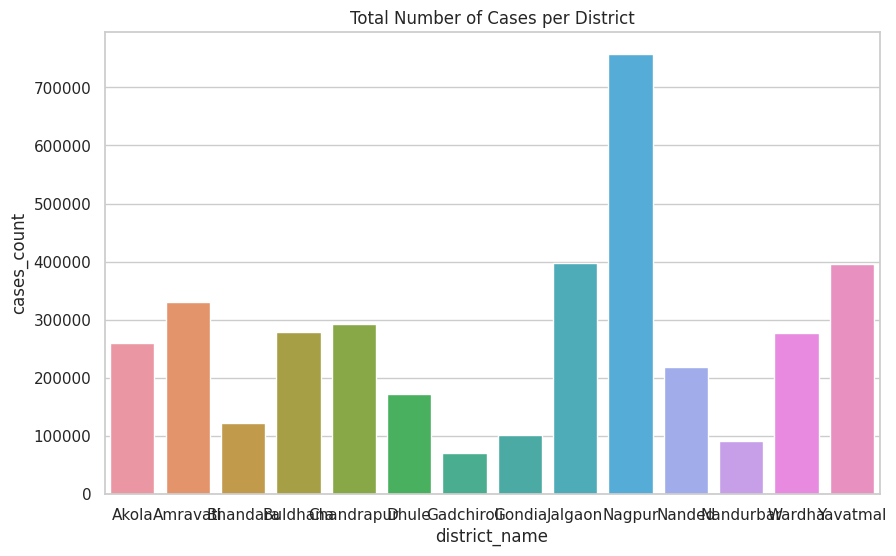

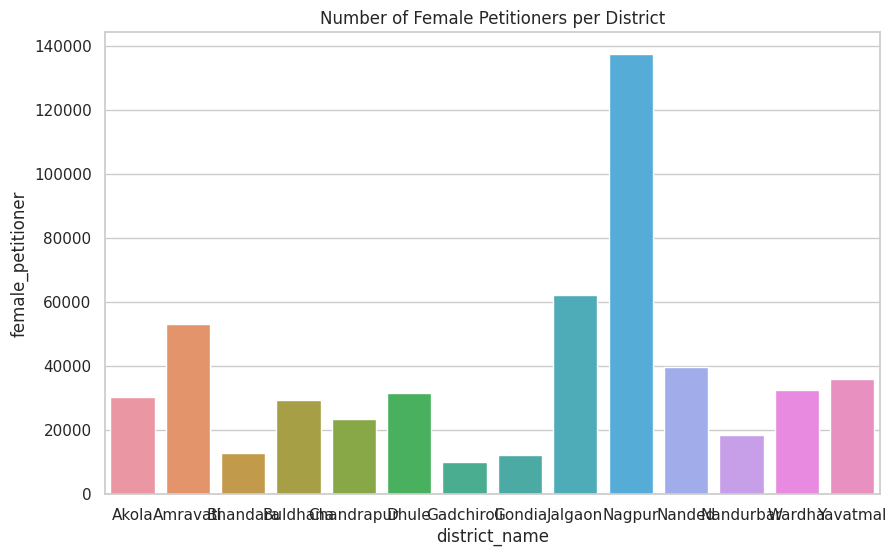

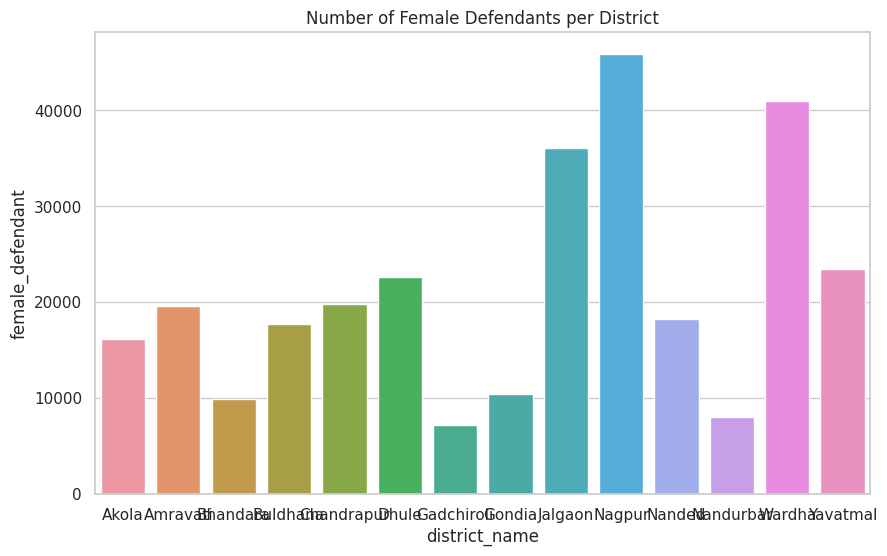

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot for the total number of cases per district
ax1 = sns.barplot(x='district_name', y='cases_count', data=combined_stats)
ax1.set_title('Total Number of Cases per District')
plt.show()

# Create a bar plot for the number of female petitioners per district
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='district_name', y='female_petitioner', data=combined_stats)
ax2.set_title('Number of Female Petitioners per District')
plt.show()

# Create a bar plot for the number of female defendants per district
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='district_name', y='female_defendant', data=combined_stats)
ax3.set_title('Number of Female Defendants per District')
plt.show()


In [63]:
acts_sections_df = pd.read_csv("./data/acts_sections.csv")

In [64]:
acts_sections_df.head()

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
0,06-03-02-210100004042014,17353,NaN,NaN,1.0,1.0
1,23-34-01-229900001012019,4759,NaN,NaN,NaN,1.0
2,13-18-03-204000030972016,17353,NaN,NaN,1.0,1.0
3,23-28-01-220102000232016,4759,NaN,NaN,NaN,1.0
4,01-35-05-203007002652012,17353,NaN,NaN,1.0,1.0


In [68]:
print("column names in mergerd_2018 df : ")
print(merged_2018.columns)

column names in mergerd_2018 df : 
Index(['ddl_case_id', 'year', 'state_code', 'dist_code', 'court_no', 'cino',
       'judge_position', 'female_defendant', 'female_petitioner',
       'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name',
       'disp_name', 'date_of_filing', 'date_of_decision', 'date_first_list',
       'date_last_list', 'date_next_list', 'state_name'],
      dtype='object')


In [69]:
print("\nColumn names in acts_sections_df DataFrame:")
print(acts_sections_df.columns)


Column names in acts_sections_df DataFrame:
Index(['ddl_case_id', 'act', 'section', 'bailable_ipc', 'number_sections_ipc',
       'criminal'],
      dtype='object')


In [70]:
merged_2018 = merged_2018.merge(acts_sections_df, on='ddl_case_id', how='left')
merged_2018.head()


,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,...,date_of_decision,date_first_list,date_last_list,date_next_list,state_name,act,section,bailable_ipc,number_sections_ipc,criminal
0,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
1,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
2,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
3,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
4,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN


In [79]:
maharashtra_cases = merged_2018[merged_2018['state_name'] == 'Maharashtra']
maharashtra_cases.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,...,date_of_decision,date_first_list,date_last_list,date_next_list,state_name,act,section,bailable_ipc,number_sections_ipc,criminal
0,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
1,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
2,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
3,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN
4,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,...,2018-02-07,2018-01-01,2018-02-07,2018-02-07,Maharashtra,NaN,NaN,NaN,NaN,NaN


In [80]:
maharashtra_act_section_counts = maharashtra_cases.groupby(['act', 'section'])['ddl_case_id'].count().reset_index()
maharashtra_act_section_counts.rename(columns={'ddl_case_id': 'case_count'}, inplace=True)
maharashtra_act_section_counts.sort_values(by='case_count', ascending=False, inplace=True)
print(maharashtra_act_section_counts.head())



Empty DataFrame
Columns: [act, section, case_count]
Index: []


In [76]:
plt.figure(figsize=(15, 6))
sns.barplot(x='act', y='case_count', hue='section', data=maharashtra_act_section_counts)
plt.xlabel('Act')
plt.ylabel('Number of Cases')
plt.title('Number of Cases by Act and Section in Maharashtra (2018)')
plt.show()



ValueError: min() arg is an empty sequence

<Figure size 1500x600 with 0 Axes>

In [81]:
print("Number of missing values in 'act':", maharashtra_cases['act'].isna().sum())
print("Number of missing values in 'section':", maharashtra_cases['section'].isna().sum())


Number of missing values in 'act': 3765564
Number of missing values in 'section': 3767994


In [83]:
act_counts = acts_sections_df.groupby('act')['ddl_case_id'].count().reset_index()
act_counts.rename(columns={'ddl_case_id': 'case_count'}, inplace=True)
act_counts.sort_values(by='case_count', ascending=False, inplace=True)
print(act_counts.head())


     act  case_count
8  17353       86190
6   4759       50833
4   3684           6
5   3821           3
1   2252           2


In [84]:
act_key_df = pd.read_csv('./data/act_key.csv')
act_key_df.head()

,act_s,count,act
0,NaN,11282.0,NaN
1,',11160.0,1.0
2,'',20887.0,2.0
3,'Tamil Nadu City Police Act,371.0,3.0
4,"(BOMBAY) NATIONAL PARK ACT, 1950",2.0,4.0


In [86]:
merged_acts_sections = acts_sections_df.merge(act_key_df, on='act', how='left')


In [87]:
merged_acts_sections.head()

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal,act_s,count
0,06-03-02-210100004042014,17353,NaN,NaN,1.0,1.0,The Indian Penal Code,20900000.0
1,23-34-01-229900001012019,4759,NaN,NaN,NaN,1.0,Code of Criminal Procedure,8630668.0
2,13-18-03-204000030972016,17353,NaN,NaN,1.0,1.0,The Indian Penal Code,20900000.0
3,23-28-01-220102000232016,4759,NaN,NaN,NaN,1.0,Code of Criminal Procedure,8630668.0
4,01-35-05-203007002652012,17353,NaN,NaN,1.0,1.0,The Indian Penal Code,20900000.0


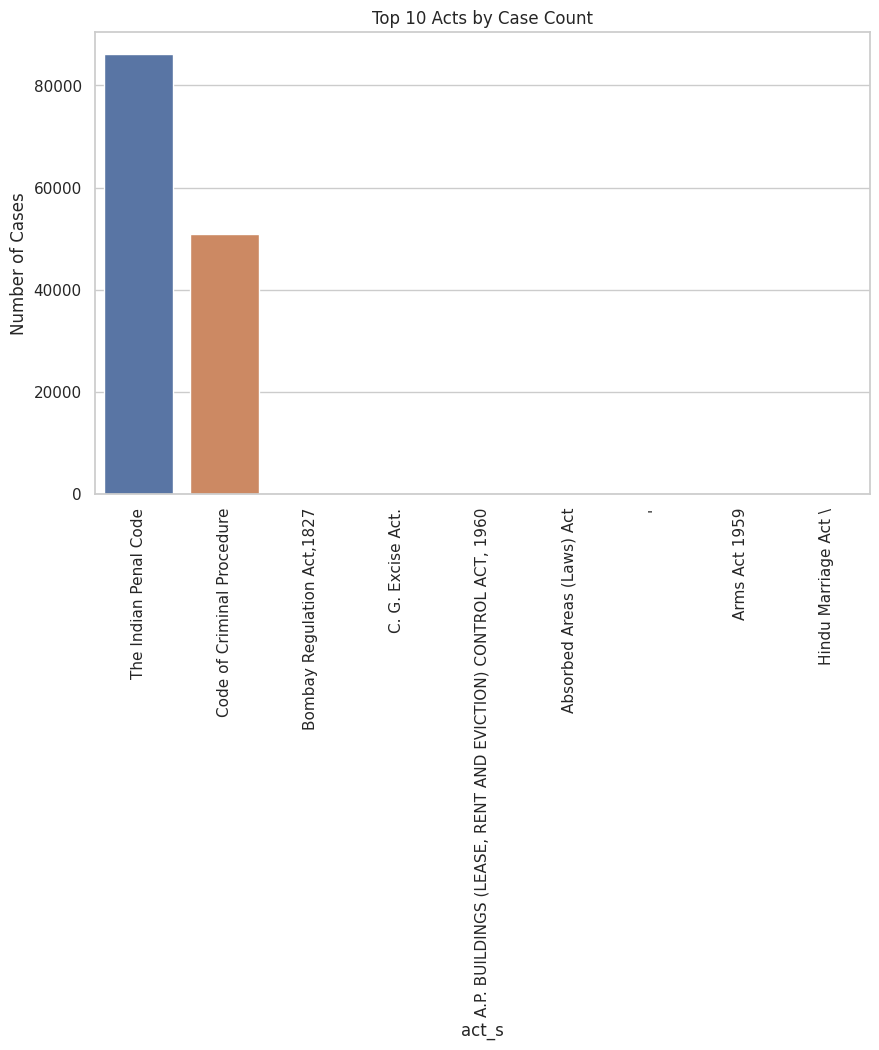

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

top_acts = merged_acts_sections.groupby('act_s')['ddl_case_id'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_acts.index, y=top_acts.values)
plt.xticks(rotation=90)
plt.ylabel("Number of Cases")
plt.title("Top 10 Acts by Case Count")
plt.show()


In [99]:
merged_acts_sections['act_s'].unique()

array(['The Indian Penal Code', 'Code of Criminal Procedure',
       'A.P. BUILDINGS (LEASE, RENT AND EVICTION) CONTROL ACT, 1960',
       'Bombay Regulation Act,1827', 'C. G. Excise Act.',
       'Hindu Marriage Act \\', 'Absorbed Areas (Laws) Act',
       'Arms Act 1959', "'"], dtype=object)

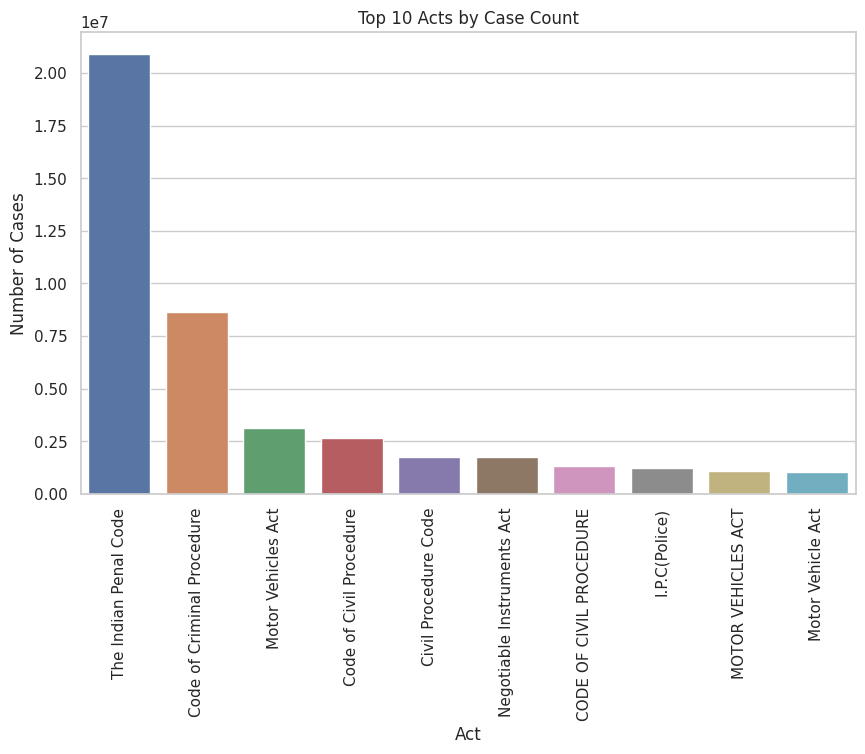

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the act_key DataFrame by the 'count' column in descending order
act_key_sorted = act_key_df.sort_values(by='count', ascending=False)

# Select the top 10 acts
top_acts = act_key_sorted.head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='act_s', y='count', data=top_acts)
plt.xticks(rotation=90)
plt.xlabel("Act")
plt.ylabel("Number of Cases")
plt.title("Top 10 Acts by Case Count")
plt.show()


In [103]:
judges_clean_df = pd.read_csv('./data/judges_clean.csv')
judges_clean_df.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [104]:
judge_gender_counts = judges_clean_df['female_judge'].value_counts().reset_index()
judge_gender_counts.columns = ['Gender', 'Count']
print(judge_gender_counts)


          Gender  Count
0    0 nonfemale  67540
1       1 female  27202
2  -9998 unclear   3735


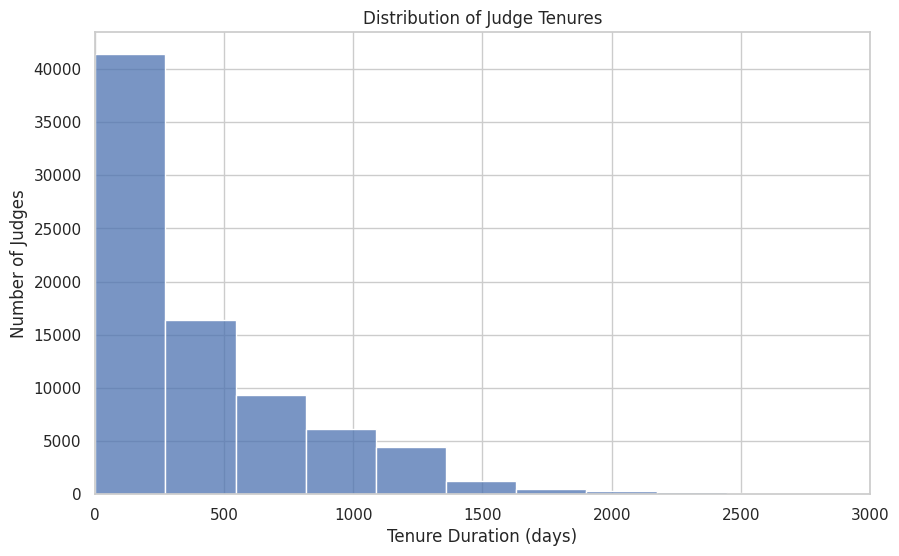

In [110]:
import pandas as pd

# Convert 'start_date' and 'end_date' to datetime objects
judges_clean_df['start_date'] = pd.to_datetime(judges_clean_df['start_date'], dayfirst=True)
judges_clean_df['end_date'] = pd.to_datetime(judges_clean_df['end_date'], dayfirst=True)

# Calculate the tenure duration for each judge
judges_clean_df['tenure_duration'] = (judges_clean_df['end_date'] - judges_clean_df['start_date']).dt.days

# Create a histogram of tenure durations
plt.figure(figsize=(10, 6))
sns.histplot(data=judges_clean_df, x='tenure_duration', bins=30)
plt.xlim(0,3000)
plt.xlabel("Tenure Duration (days)")
plt.ylabel("Number of Judges")
plt.title("Distribution of Judge Tenures")
plt.show()


In [112]:
cases_2018_df.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-201900000012018,2018,1,1,1.0,MHNB030000022018,chief judicial magistrate,0 male,0 male,-9999.0,0.0,1943.0,2975.0,33.0,2018-01-01,2018-02-07,2018-01-01,2018-02-07,2018-02-07
1,01-01-01-201900000022018,2018,1,1,1.0,MHNB030000032018,chief judicial magistrate,0 male,0 male,-9999.0,0.0,1943.0,3315.0,52.0,2018-01-01,2018-02-01,2018-01-01,2018-02-01,2018-02-01
2,01-01-01-201900000032018,2018,1,1,1.0,MHNB030000042018,chief judicial magistrate,0 male,0 male,-9999.0,0.0,1943.0,5877.0,52.0,2018-01-01,2018-02-01,2018-01-01,2018-02-01,2018-02-01
3,01-01-01-201900000042018,2018,1,1,1.0,MHNB030000052018,chief judicial magistrate,0 male,0 male,-9999.0,0.0,1943.0,840.0,52.0,2018-01-01,2018-02-01,2018-01-01,2018-02-01,2018-02-01
4,01-01-01-201900000052018,2018,1,1,1.0,MHNB030000062018,chief judicial magistrate,-9998 unclear,0 male,-9999.0,1.0,1943.0,840.0,5.0,2018-01-01,2018-01-09,2018-01-01,2018-01-09,2018-01-09
